<a href="https://colab.research.google.com/github/joaopaulof19/Doencas-Cardiovasculares/blob/main/Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [2]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [3]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [4]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## ANÁLISE EXPLORATÓRIA DE DADOS

* Ver o tamanho do df (shape)
* Ver a descrição estatística do df (describe)
* Ver os tipos das variáveis do df (dtypes)
* Ver as 5 primeiras entradas do df (head)
* Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset* (value_counts)
* Ver valores ausentes do df (isnull().sum())
* Plotar o gráfico de linha para df_brasil
* Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
* Plotar o gráfico de dispersão para as variáveis `age` e `chol`
* plotar um histograma para o colesterol sérico
* plotar um gráfico de pizza para `restecg`
* Plotar um *heatmap* com as correlações




In [5]:
df.shape
print(f'O DataFrame possui {df.shape[0]} registros e {df.shape[1]} atributos.')

O DataFrame possui 303 registros e 14 atributos.


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [7]:
df.cp.value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

  Podemos tirar algumas informações relevantes dos dados estatísticos.
As pessoas que teve seus dados estudados tem em média uma idade de 55 anos, onde em sua maioria são do sexo masculino. A maioria dos pacientes constataram o tipo da dor torácica **assintomática**. A grande maioria tiveram a taxa de açucar no sangue menor que **120mg/dl** em **jejum**. O numero de pessoas que tiveram a angina induzida pelo exercício representam a minoria. 

In [8]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

<p>Apesar de nossa função dtypes mostrar que todas as variáveis são numéricas, sabemos que parte delas são categóricas.</p> 

<p>

**Sex**(sexo), **cp**, **fbs**, **restecg**, **exang**, **thal** e **num** são as **variáveis categoricas** que utilizaremos números para representar suas respectivas categorias.

</p>

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.num.value_counts() / df.shape[0]

0    0.541254
1    0.458746
Name: num, dtype: float64

A amostra é constituída de **54%** de pacientes **sem**  e **46%** **com** doença cadíaca. 

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<p>Um dataset sem dados faltantes, que maravilha! 😁</p>
<p>Aaaahh se todos os casos fosse assim... Esse é o início de análise exploratória que todo analista/cientista de dados sonha !!!! </p>

In [14]:
import seaborn as sns

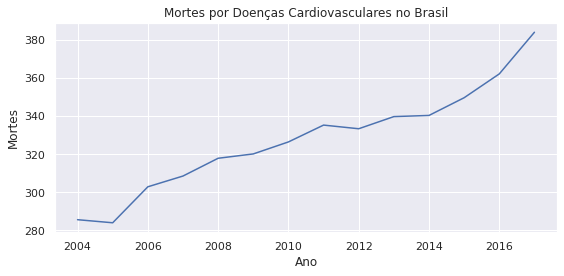

In [134]:
# Gráfico de linhas para casos de mortes por doenças cardiovasculares no decorrer dos anos
sns.set()

x_ano = df_brasil['ano']
y_mortes = df_brasil['mortes_doencas_cardio']

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_ano, y_mortes)

ax.set_title('Mortes por Doenças Cardiovasculares no Brasil')
ax.set_ylabel('Mortes')
ax.set_xlabel('Ano')

plt.tight_layout()


<p>Uaaaw! 😱</p>
<p>No decorrer dos anos, aumentou consideravelmente as mortes por doenças cardiovasculares no Brasil. </p>
<p>Na melhor das hipóteses, deve-se ao fato de os dados coletados hoje em dia ser mais frequente, enquanto antigamente já era mais difícil. Porém, não podemos excluir a possibilidade de o número aumentar realmente dessa forma, e sendo assim, é um motivo para se preocupar e investigar o que pode está acontecendo.</p>


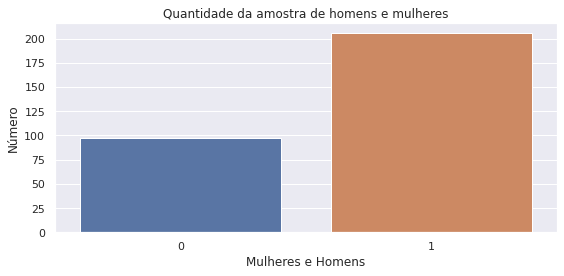

In [135]:
# Gráfico de barras para comparar quantidade de homens e mulheres na amostra

df.sex =df.sex.astype(int)
x_sexo = df.sex.value_counts().index
y_sexo = df.sex.value_counts().values

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x=x_sexo, y=y_sexo)

ax.set_title('Quantidade da amostra de homens e mulheres')
ax.set_xlabel('Mulheres e Homens')
ax.set_ylabel('Número')

plt.tight_layout();

Verificamos aqui que a amostra é composta de cerca do dobro de homens em relação ao número de mulheres. 

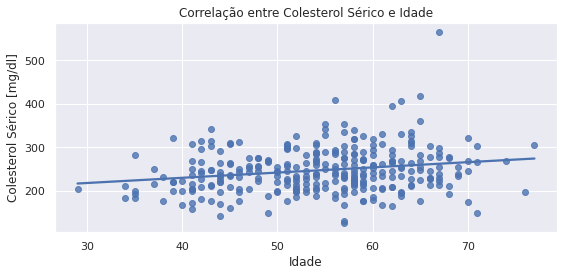

In [136]:
# Gráfico de dispersão para verificar correlação entre idade e colesterol sérico

x_age = df.age
y_chol = df.chol

fig, ax = plt.subplots(figsize=(8, 4))
sns.regplot(x=x_age, y=y_chol, ci=None)
ax.set_title('Correlação entre Colesterol Sérico e Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol Sérico [mg/dl]')

plt.tight_layout()

<p>Através do grafico de dispersão, conseguimos enxergar uma certa correlação positiva entre as duas variáveis plotadas no gráfico, mesmo que aparentemente não seja uma correlação tão forte. </p>

<p>

Isso significa dizer que a concentração de **colesterol sérico** pode estar **relacionado** à **idade** do paciente, sendo diretamente proporcional.
</p>

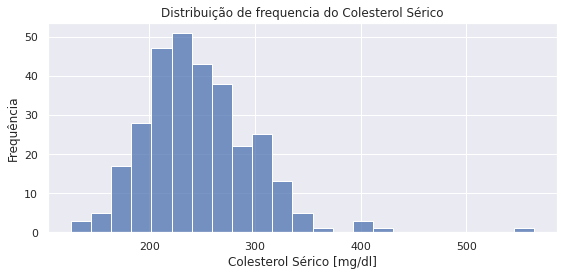

In [137]:
# Gráfico histograma para verificar a distribuição

fig, ax = plt.subplots(figsize=(8, 4))

sns.histplot(data=df, x=y_chol)
ax.set_title('Distribuição de frequencia do Colesterol Sérico')
ax.set_xlabel('Colesterol Sérico [mg/dl]')
ax.set_ylabel('Frequência')

plt.tight_layout()

<p>O gráfico à cima é semelhante a uma Gaussiana(distribuição Normal), com isso, podemos aproveitar e já inferir algumas informações.
</p>

<p>

Podemos já inferir que a concentração **média** do **Colesterol Sérico** coletado é em torno de **230 à 240mg/dL**, seus valores **geralmente** ficam em torno de **100mg/dL e 360mg/dL**, e que seu valor máximo foi de mais de 500mg/dL sendo visivelmente um Outlier.
</p>

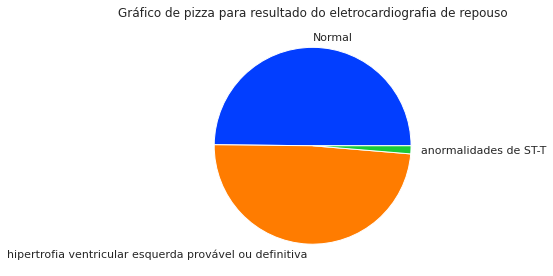

In [138]:
# Gráfico de pizza para comparar categorias de restecg

df.restecg = df.restecg.astype(int)
x_restecg =df.restecg.value_counts().index
y_restecg =df.restecg.value_counts().values

fig, ax = plt.subplots(figsize=(8,4))
ax.set_title('Gráfico de pizza para resultado do eletrocardiografia de repouso')
color = sns.color_palette('bright')
rotulo = ['Normal', 'hipertrofia ventricular esquerda provável ou definitiva', 'anormalidades de ST-T']
plt.pie(x=y_restecg, colors=color, labels=rotulo)

plt.tight_layout()

Através do **Gráfico de pizza**, podemos verificar que a grande maioria do **resultado do eletrocardiografia de repouso** está ***normal*** ou teve ***hipertrofia ventricular esquerda provável ou definitiva***, já a categoria ***anormalidades de ST-T*** foi minoria, quase que não aparecendo. 

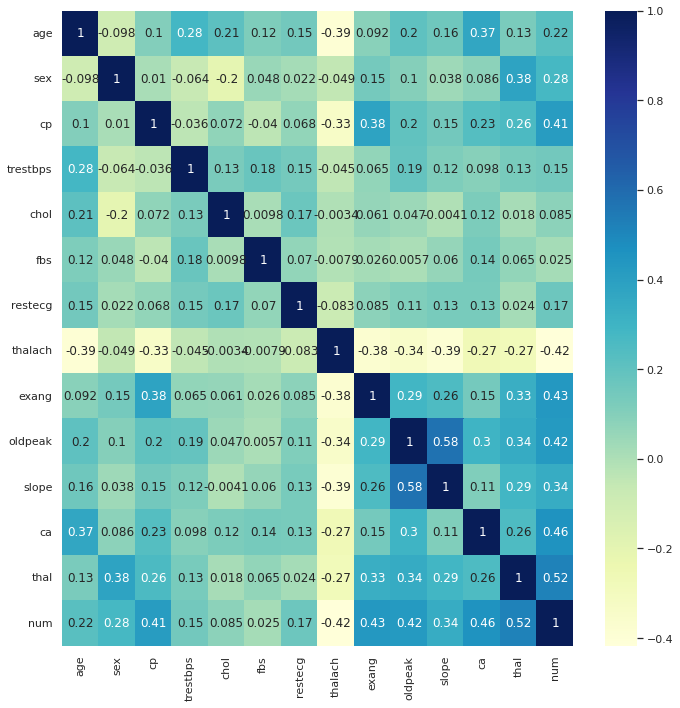

In [149]:
# heatmap com as correlações de todas as variáveis

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(df.corr(), annot=True, ax=ax, cmap='YlGnBu')

plt.tight_layout()

<p>Com o heatmap plotado verificamos a correlação entre as variáveis do DataFrame. O gráfico nos mostra coeficiente de correlação de -0.4 à 1. Se negativa, significa que a correlação entre as variáveis são inversamente proporcional. </p>
<p>
Segue uma imagem ilustrando faixa de valores indicando se há correlação forte ou fraca.
</p>

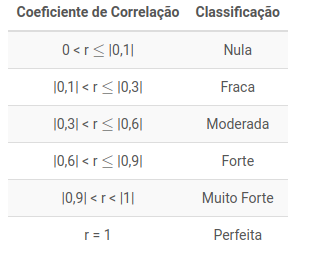

<p>Com base nessa tabela, podemos verificar o quão forte é a correlação entre cada variável. </p>

<p>

Algumas das correlações que podemos identificar como mais próxima de uma correlação mais forte são, entre a variável **num**(diagnóstico de doença cardíaca) com **thalach**(frequência cardíaca máxima atingida), **exang**(angina induzida pelo exercício), **oldpeak**(depessão do segmento ST induzida pelo exercício em relação ao repouso), **ca**(número de vasos principais colorido por fluoroscopia). As variáveis "num" e "thalach" tem correlação negativa, já as demais citadas, correlação positiva.
</p>

<p>
Sempre bom ressaltar, que correlação não implica causalidade. Portanto, essa correlação pode sim ser verdadeira, mas também há chances de ter acontecido alguma mera coincidência. 
</p>